Import the dependencies

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Preprocessing

In [26]:
# load our dataset
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [27]:
#print the first 5rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
#number of rows and cloumns
gold_data.shape

(2290, 6)

In [31]:
#print the last 5rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [34]:
#some basic infos
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [35]:
#number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [28]:
#some statisticals
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :
1. Positive Correlation
2. negative Correlation

In [36]:
correlation=gold_data.corr()

<ipython-input-36-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


Checking the correlation between variables helps us understand how they relate to each other:

1-->Positive correlation means when one variable goes up, the other tends to go up too.

2-->Negative correlation means when one variable goes up, the other tends to go down.

3-->No correlation means there's little to no predictable relationship between the variables.

<Axes: >

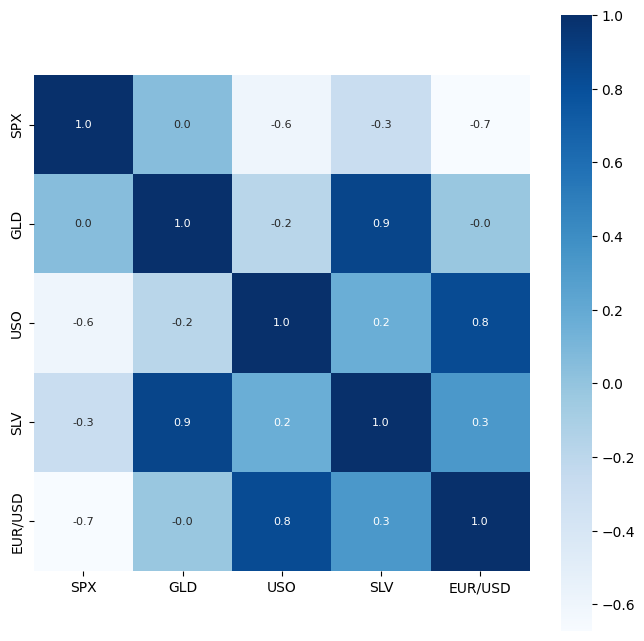

In [38]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size': 8}, cmap='Blues')


In [39]:
# correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


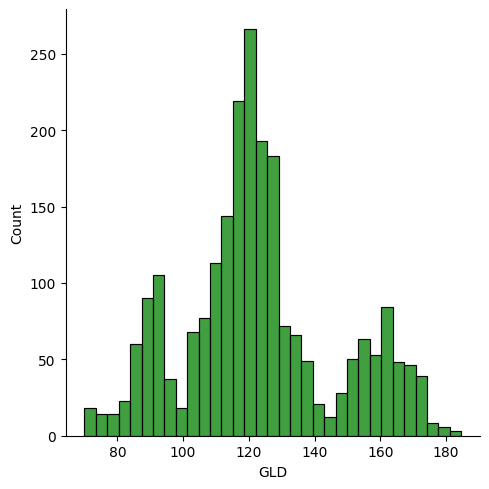

In [40]:
# destribution of the gld price
sns.displot(gold_data['GLD'],color='green')

Spliting the features and target

In [41]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [42]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting to test and train

In [43]:
X_train,X_test,Y_train ,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model training : Random forest regressor

In [49]:
regressor=RandomForestRegressor(n_estimators=100)

In [50]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [58]:
# predecting on test data
test_data_predicition=regressor.predict(X_test)

In [59]:
print(test_data_predicition)

[168.4306992   81.94159978 116.04040031 127.63030057 120.69760119
 154.76809782 150.64169857 126.30070046 117.44459891 125.79880091
 116.39040093 171.80620043 142.07589851 167.71459864 115.13390026
 117.80520015 138.66910371 170.06040121 159.47750298 159.03359883
 155.13029975 125.07100034 175.87760039 156.8131038  125.27980046
  93.9872994   77.2226001  120.8162002  119.12249924 167.48729977
  88.24550032 125.42200041  91.17250071 117.79670009 121.03759926
 136.46280069 115.27350148 115.15430093 148.10449983 107.08850097
 104.68220248  87.20099769 126.59390063 118.00870003 152.94749893
 119.71939996 108.43179971 108.32909824  93.13850054 127.11859752
  74.8166007  113.56639919 121.39440008 111.31499933 118.79219871
 120.89509932 160.07680016 167.61040163 147.0361972   85.73369832
  94.30770037  86.81569852  90.5660001  119.15760077 126.40600073
 127.64210022 170.10879913 122.3139992  117.43519878  98.43370027
 168.26090181 142.99009907 131.79160251 121.25200235 121.74059947
 119.46390

In [61]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_predicition)
print("R square error = ",error_score)

R square error =  0.9889718934663148


Compare the actual values and predicted values in plot

In [62]:
Y_test = list(Y_test)

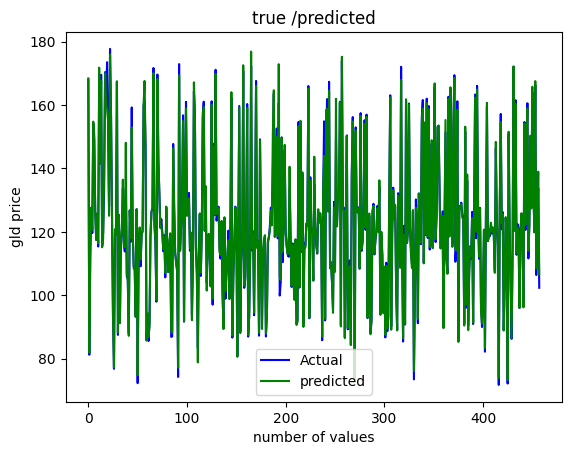

In [65]:
plt.plot(Y_test,color='blue',label='Actual')
plt.plot(test_data_predicition , color='green' ,label="predicted")
plt.title('true /predicted')
plt.xlabel('number of values')
plt.ylabel('gld price')
plt.legend()
plt.show()